# Chapter 1. Exploratory data analysis 

## 1.1 Elements of structured data

For the purpose of data analysis and predictive modeling, the data type is important to help determine the type of visual display, data analysis, or statistical model

Using data types to improve computational performance

Data typing in software acts as a signal to the software on how to process the data

## 1.2 Rectangular data

Rectangular data is the general term for a two-dimensional matrix with rows indicating records (cases) and columns indicating features (variables)

Unstructured data, such as text, must be processed and manipulated so that it can be represented as a set of features in the rectangular data

Data in relational databases must be extracted and put into a single table for most data analysis and modeling tasks

### Data frames and indexes

Traditional database tables have one or more columns designated as an index, essentially a row number. This can vastly improve the efficiency of certain database queries

In Python, an automatic integer index is created for a DataFrame based on the order of the rows. In pandas,it is also possible to set multilevel or hierarchical indexes to improve the efficiency of certain operations

### Nonrectangular data structures

Time series data records successive measurements of the same variable. It is the raw material for statistical forecasting methods

Spatial data structures, which are used in mapping and location analytics, are more complex and varied than rectangular data structures

Graph or network data structures are used to represent physical, social and abstract relationships. 

## 1.3 Estimates of location

An estimate of where most of the data is located, its central tendency

### Mean

Mean, trimmed mean, weighted mean

### Median and robust estimates

The median is referred to as a robust estimate of location sine it is not influenced by outliers that could skew the results

### Example: location estimates of population and murder rates

In [1]:
import pandas as pd
state = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [2]:
state['Population'].mean()

6162876.3

In [3]:
import scipy.stats as sp
sp.trim_mean(state['Population'], 0.1)

4783697.125

In [4]:
state['Population'].median()

4436369.5

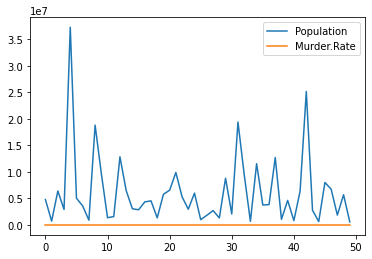

In [5]:
state.plot()

In [6]:
import numpy as np
np.average(state['Murder.Rate'], weights = state['Population'])

4.445833981123393

In [7]:
import wquantiles
wquantiles.median(state['Murder.Rate'], weights = state['Population'])

4.4

## 1.4 Estimates of variability

Variability or dispersion measures whether the data values are tightly clustered or spread out

### Standard deviation and related estimates

mean absolute deviation, variance, standard deviation

degrees of freedom

median absolute deviation

### Estimates based on percentiles

interquartile range - IQR - the difference between the 25th percentile and the 75th percentile

### Example: variability estimates of state population

In [8]:
state['Population'].std()

6848235.347401142

In [9]:
state['Population'].quantile(0.75)

6680312.25

In [10]:
state['Population'].quantile(0.25)

1833004.25

## 1.5 Exploring the data distribution

### Percentiles and boxplots

In [11]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

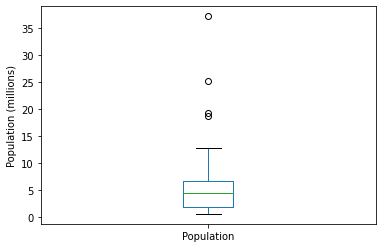

In [12]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

### Frequency tables and histograms

In [13]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

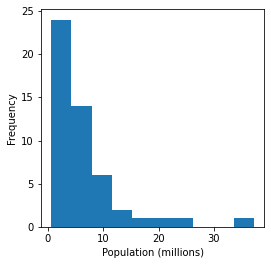

In [15]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize = (4,4))
ax.set_xlabel('Population (millions)')

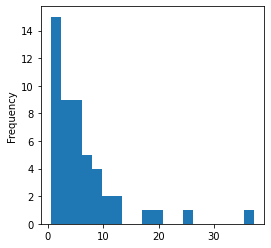

In [19]:
ax = (state['Population']/1_000_000).plot.hist(bins = 20, figsize = (4,4))

**Statistical moments**

In statistical theory, location and variability are referred at the first and second moments of a distribution. The third and fourth moments are called skewness and kurtosis. Skewness refers to whether the data is skewed to larger or smaller values, and kurtosis indicates the propensity of the data to have extreme values

1. Location
2. Variability
3. Skewness
4. Kurtosis

### Density plots and estimates

Text(0.5, 0, 'Murder Rate (per 100,000)')

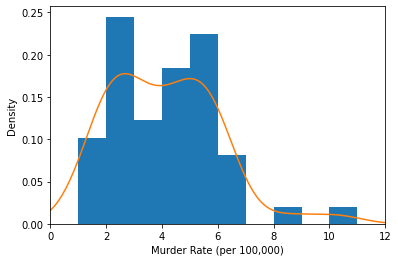

In [20]:
ax = state['Murder.Rate'].plot.hist(density = True, xlim = [0, 12], bins = range(1, 12))
state['Murder.Rate'].plot.density(ax = ax)
ax.set_xlabel('Murder Rate (per 100,000)')

## 1.6 Exploring binary and categorical data

In [25]:
dfw = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/dfw_airline.csv')
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

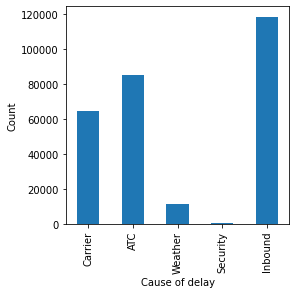

In [23]:
ax = dfw.transpose().plot.bar(figsize = (4,4), legend = False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

A bar chart resembles a histogram. In a bar chart, the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale

### Mode

### Expected value

### Probability

## 1.7 Correlation

In [28]:
import seaborn as sns
sp500_px = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/sp500_data.csv', index_col = 0)
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [30]:
sp500_sym = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/sp500_sectors.csv')
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


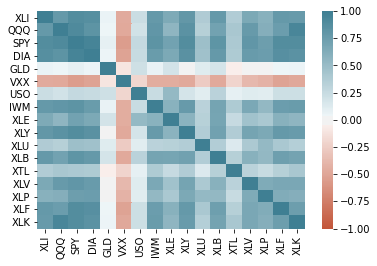

In [32]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin = -1, vmax = 1, cmap = sns.diverging_palette(20, 220, as_cmap = True))

### Scatterplots

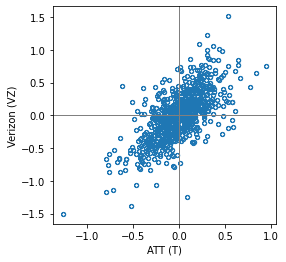

In [33]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

ax = telecom.plot.scatter(x = 'T', y = 'VZ', figsize = (4,4), marker = '$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color = 'grey', lw = 1)
ax.axvline(0, color = 'grey', lw = 1)

## 1.8 Exploring two or more variables

In [36]:
kc_tax = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/kc_tax.csv.gz', compression = 'gzip')
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


### Hexagonal binning and contours (plotting numeric versus numeric data)

In [40]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) & 
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax_Assessed Value')

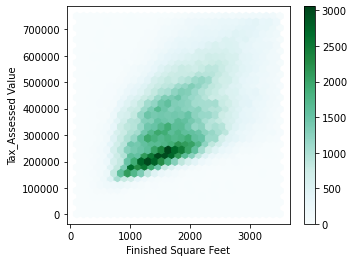

In [42]:
ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue', 
                         gridsize = 30, sharex = False, figsize = (5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax_Assessed Value')

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, ax = ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')
plt.tight_layout()
plt.show()

### Two categorical variables

In [49]:
lc_loans = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/lc_loans.csv')
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [51]:
crosstab = lc_loans.pivot_table(index = 'grade', columns = 'status', aggfunc = lambda x:len(x), margins = True)

df = crosstab.loc['A':'G',:].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis = 0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


### Categorical and numeric data

In [52]:
airline_stats = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/airline_stats.csv')
airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


Text(0.5, 0.98, '')

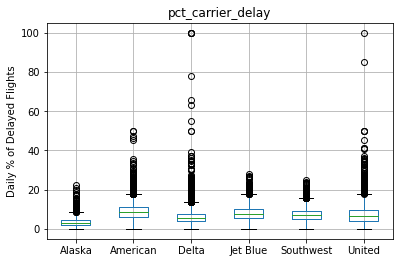

In [53]:
ax = airline_stats.boxplot(by = 'airline', column = 'pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Text(0, 0.5, 'Daily % of Delayed Flights')

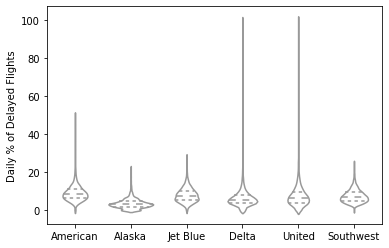

In [54]:
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay, inner = 'quartile', color = 'white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

### Visualizing multiple variables

In [55]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


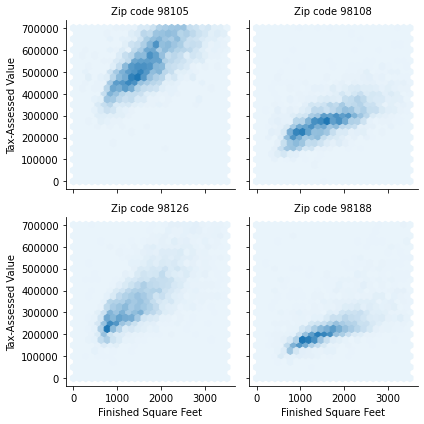

In [57]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap = True)
    plt.hexbin(x, y, gridsize = 25, cmap = cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col = 'ZipCode', col_wrap = 2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent = [0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')